<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Convolutional%20Neural%20Networks/03_computer_vision_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Covolutional Neural Networks (CNN) and Computer Vision w/ TensorFlow

Computer vision - practice of writing algorithms which can discover patterns in visual data.
  - ex: camera on autonomous cars

## Get the data

Adapted from Food101 dataset (101 diff classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However modified it to only use two classes (pizza and steak)

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-20 02:00:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   161MB/s    in 0.6s    

2023-07-20 02:00:54 (161 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspecting data

In [3]:
!ls pizza_steak # list the files in "pizza_steak"

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [7]:
# Another way
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualiize images, first get class names programmatically

In [8]:
# Get class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
from re import A
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir + target_class

  # Get rand image path
  random_image = random.sample(os.listdir(target_folder), 1) # randomly sample 1 of the items from here
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show shape of image

  return img

['2999507.jpg']
Image shape: (512, 306, 3)


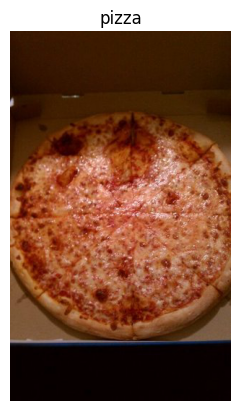

In [10]:
# View random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 306, 3), dtype=uint8, numpy=
array([[[52, 20,  0],
        [52, 20,  0],
        [53, 21,  0],
        ...,
        [53, 25,  1],
        [58, 28,  4],
        [58, 28,  4]],

       [[52, 20,  0],
        [52, 20,  0],
        [53, 21,  0],
        ...,
        [53, 25,  1],
        [55, 27,  3],
        [55, 27,  3]],

       [[52, 20,  0],
        [53, 21,  0],
        [53, 21,  0],
        ...,
        [53, 25,  1],
        [57, 29,  5],
        [57, 29,  5]],

       ...,

       [[ 8,  0,  0],
        [ 8,  0,  0],
        [ 8,  0,  0],
        ...,
        [ 9,  0,  1],
        [10,  0,  0],
        [10,  0,  0]],

       [[ 8,  0,  0],
        [ 8,  0,  0],
        [ 8,  0,  0],
        ...,
        [ 9,  0,  1],
        [10,  0,  0],
        [10,  0,  0]],

       [[ 8,  0,  0],
        [ 8,  0,  0],
        [ 8,  0,  0],
        ...,
        [ 9,  0,  1],
        [10,  0,  0],
        [10,  0,  0]]], dtype=uint8)>

In [12]:
# View image shape
img.shape # returns width, height, color channels

(512, 306, 3)

In [13]:
# Get all pixel values b/w 0 & 1 (NORMALIZE DATA)
img/255. # 255 is max value for any pixel value

array([[[0.20392157, 0.07843137, 0.        ],
        [0.20392157, 0.07843137, 0.        ],
        [0.20784314, 0.08235294, 0.        ],
        ...,
        [0.20784314, 0.09803922, 0.00392157],
        [0.22745098, 0.10980392, 0.01568627],
        [0.22745098, 0.10980392, 0.01568627]],

       [[0.20392157, 0.07843137, 0.        ],
        [0.20392157, 0.07843137, 0.        ],
        [0.20784314, 0.08235294, 0.        ],
        ...,
        [0.20784314, 0.09803922, 0.00392157],
        [0.21568627, 0.10588235, 0.01176471],
        [0.21568627, 0.10588235, 0.01176471]],

       [[0.20392157, 0.07843137, 0.        ],
        [0.20784314, 0.08235294, 0.        ],
        [0.20784314, 0.08235294, 0.        ],
        ...,
        [0.20784314, 0.09803922, 0.00392157],
        [0.22352941, 0.11372549, 0.01960784],
        [0.22352941, 0.11372549, 0.01960784]],

       ...,

       [[0.03137255, 0.        , 0.        ],
        [0.03137255, 0.        , 0.        ],
        [0.03137255, 0

## End-to-end example

In [14]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set rand seed
tf.random.set_seed(42)

# Preprocess data (normalizing all pixel data or getting them b/w 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test" #/content isn' necessary

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # from the training directory above
                                               batch_size=32, # number of samples passed through network at a time
                                               target_size=(224, 224),  # ideal target size for images
                                               class_mode="binary",   # indicates that the classification is binary (only two types of images)
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # same as above layer just w/o specified input size
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 batches of 32 images, therefore steps/epoch needs to be # of the batches
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 267ms/step - loss: 0.5758 - accuracy: 0.6873 - val_loss: 0.4109 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 12s 262ms/step - loss: 0.4387 - accuracy: 0.7947 - val_loss: 0.3517 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4004 - accuracy: 0.8173 - val_loss: 0.3338 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3573 - accuracy: 0.8473 - val_loss: 0.3139 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 12s 257ms/step - loss: 0.3375 - accuracy: 0.8620 - val_loss: 0.3443 - val_accuracy: 0.8460


Before using a GPU took quite a while to train:

Epoch 1/5
47/47 [==============================] - 139s 3s/step - loss: 0.6057 - accuracy: 0.6607 - val_loss: 0.4135 - val_accuracy: 0.8300




In [16]:
# Model summary
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using a non-CNN w/ Image data

Model from [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [18]:
train_data

In [19]:
# Set rand seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 234ms/step - loss: 0.8117 - accuracy: 0.4907 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 266ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
# Summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Try to improve model_2
- Despite 20x more parameters than CNN (model_1), model_2 doesn't perform well

In [23]:
# Set rand seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 228ms/step - loss: 4.0258 - accuracy: 0.6273 - val_loss: 0.7111 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 12s 267ms/step - loss: 1.1550 - accuracy: 0.6780 - val_loss: 0.5927 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.7239 - accuracy: 0.7180 - val_loss: 0.7900 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.9274 - accuracy: 0.7093 - val_loss: 0.4503 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 16s 343ms/step - loss: 0.4960 - accuracy: 0.7773 - val_loss: 0.4664 - val_accuracy: 0.7720


In [24]:
# Get summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [27]:
15000000/31000
# Model 3 has roughly 500x the parameters as the CNN model, but doesn't perform nearly as well

483.8709677419355